# Desenvolvimento dos Key Performance Indicators (KPIs) do Setor Industrial

Este projeto visa o estudo e o desenvolvimento de KPIs industriais para analise dos resultados obtidos referente ao segundo semestre de 2020. O dataset utilizado simula dados oriundos de um processo de produção, no qual informações são inputadas por usuarios via sistema e posteriormente importados para seu tratamento e disponibilização. O cenário criado para esta simulação leva em consideração desvios tanto no processo produtivo, quanto no processo de input de dados para associar a problemas que podem comumente ocorrer ao longo de uma produção.

Uma vez realizado as operações necessarias para normalização dos dados, os KPIs selecionados para exemplificar esta demonstração são explicados, levando em conta as boas praticas do ambiente industrial. Por fim são exibidos os KPIs obtidos ao final da simulação, com o intuito de exemplificar métodos e visualizações possíveis para obter a maior riqueza de informações 

In [1]:
# Importando bibliotecas que serão utilizadas ao longo do projeto
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Realizando a importação do dataset bruto que será utilizado
raw_data = pd.read_excel('OEE_2020.xlsx')

In [4]:
# Criando dataframe auxiliar com a presença dos dados que serão necessários para a elaboração dos KPIs.
df = raw_data[['Ano','Mes','DataTurno','DiaDaSemana','TurnoDescricao','Equipamento','ProducaoTeorica','QtdProduzida','Perda','PesoPerda','PesoProducao','TempoProgramado','TempoProduzindo']]
df.head()

,Ano,Mes,DataTurno,DiaDaSemana,TurnoDescricao,Equipamento,ProducaoTeorica,QtdProduzida,Perda,PesoPerda,PesoProducao,TempoProgramado,TempoProduzindo
0,2020,07 - JULHO,2020-07-01,QUARTA-FEIRA,TURNO 01,AB-01,10672,10500,347,11.798,357.00,500,458
1,2020,07 - JULHO,2020-07-01,QUARTA-FEIRA,TURNO 02,AB-01,11278,11400,3,0.102,387.60,484,484
2,2020,07 - JULHO,2020-07-01,QUARTA-FEIRA,TURNO 03,AB-01,10369,10320,4,0.136,350.88,445,445
3,2020,07 - JULHO,2020-07-01,QUARTA-FEIRA,TURNO 01,AB-02,11830,11680,8,0.256,373.76,488,488
4,2020,07 - JULHO,2020-07-01,QUARTA-FEIRA,TURNO 02,AB-02,12000,11680,0,0.000,373.76,495,495


In [78]:
# Com o dataframe criado, de maneira semelhante é verificado as suas informações
df.info(verbose=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25030 entries, 0 to 25029
Data columns (total 13 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Ano              int64         
 1   Mes              object        
 2   DataTurno        datetime64[ns]
 3   DiaDaSemana      object        
 4   TurnoDescricao   object        
 5   Equipamento      object        
 6   ProducaoTeorica  int64         
 7   QtdProduzida     int64         
 8   Perda            int64         
 9   PesoPerda        float64       
 10  PesoProducao     float64       
 11  TempoProgramado  int64         
 12  TempoProduzindo  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 2.5+ MB


In [6]:
# Filtro para identificação de registros nulos que devem ser tratados.
df[df['Equipamento'].isnull()]

,Ano,Mes,DataTurno,DiaDaSemana,TurnoDescricao,Equipamento,ProducaoTeorica,QtdProduzida,Perda,PesoPerda,PesoProducao,TempoProgramado,TempoProduzindo
10267,2020,09 - SETEMBRO,2020-09-12,SÁBADO,TURNO 01,NaN,600,584,0,0.000,82.928,120,120
10268,2020,09 - SETEMBRO,2020-09-12,SÁBADO,TURNO 02,NaN,1125,1447,1,0.142,205.474,225,225


Verificado junto ao time de Planejamento os dois registros encontrados são referentes a equipamentos descontinuados que tiveram apenas dois registro ao longo de todo o semestre. Sendo assim os mesmos são retidados da analise geral.

In [7]:
# Retirando registros nulos encontrados
df_clean = df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25028 entries, 0 to 25029
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ano              25028 non-null  int64         
 1   Mes              25028 non-null  object        
 2   DataTurno        25028 non-null  datetime64[ns]
 3   DiaDaSemana      25028 non-null  object        
 4   TurnoDescricao   25028 non-null  object        
 5   Equipamento      25028 non-null  object        
 6   ProducaoTeorica  25028 non-null  int64         
 7   QtdProduzida     25028 non-null  int64         
 8   Perda            25028 non-null  int64         
 9   PesoPerda        25028 non-null  float64       
 10  PesoProducao     25028 non-null  float64       
 11  TempoProgramado  25028 non-null  int64         
 12  TempoProduzindo  25028 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 2.7+ MB


In [8]:
#Após a retirada dos registros é feita a observação geral dos dados, necessario para identificar possiveis valores discrepantes que vão necessitar de tratamento.
df_clean.describe()

,Ano,ProducaoTeorica,QtdProduzida,Perda,PesoPerda,PesoProducao,TempoProgramado,TempoProduzindo
count,25028.0,25028.000000,25028.000000,25028.000000,25028.000000,25028.000000,25028.000000,25028.000000
mean,2020.0,5133.744806,5031.718635,25.836503,3.037035,610.960243,370.892321,339.938749
std,0.0,6435.375799,6293.107616,171.118106,6.096430,441.956915,186.663776,186.161886
min,2020.0,-54830.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1219.000000
25%,2020.0,1893.000000,1800.000000,0.000000,0.000000,245.210000,382.000000,258.000000
50%,2020.0,3141.000000,3086.500000,4.000000,0.690000,639.859500,445.000000,436.000000
75%,2020.0,6826.000000,6741.250000,20.000000,3.420000,958.946250,495.000000,470.000000
max,2020.0,43200.000000,45000.000000,23498.000000,143.878000,1752.261000,504.000000,504.000000


O retorno da tabela de descrição estatistica das colunas retorna a presença de valores negativos para a produção teorica de um equipamento e o tempo que o mesmo esteve produzindo. Como em ambos os campos este tipo de dados não é possível, os mesmo são contabilizados e retirados do dataset.

In [9]:
# Contabilizando e identificando registros negativos
print(f'Quantidade de registros negativos = {len(df_clean.query("ProducaoTeorica < 0 or TempoProduzindo < 0"))}')
df_clean.query('ProducaoTeorica < 0 or TempoProduzindo < 0')

Quantidade de registros negativos = 35


,Ano,Mes,DataTurno,DiaDaSemana,TurnoDescricao,Equipamento,ProducaoTeorica,QtdProduzida,Perda,PesoPerda,PesoProducao,TempoProgramado,TempoProduzindo
50,2020,07 - JULHO,2020-07-01,QUARTA-FEIRA,TURNO 03,UV-01,-12315,4800,10,1.240,595.200,445,-1016
344,2020,07 - JULHO,2020-07-03,SEXTA-FEIRA,TURNO 02,CD-02,-17582,8505,57,1.995,297.675,495,-967
1752,2020,07 - JULHO,2020-07-12,DOMINGO,TURNO 03,RS-15,-6756,2784,46,16.790,1016.160,445,-1001
2389,2020,07 - JULHO,2020-07-17,SEXTA-FEIRA,TURNO 03,RS-15,-7781,3408,0,0.000,1243.920,445,-1005
6120,2020,08 - AGOSTO,2020-08-13,QUINTA-FEIRA,TURNO 01,UV-09,-889,6480,2,0.196,635.040,485,-63
7806,2020,08 - AGOSTO,2020-08-25,TERÇA-FEIRA,TURNO 02,UV-12,-351,400,100,2.300,9.200,59,-9
8215,2020,08 - AGOSTO,2020-08-28,SEXTA-FEIRA,TURNO 03,UV-15,-16992,5739,30,3.840,734.592,445,-1062
8773,2020,09 - SETEMBRO,2020-09-01,TERÇA-FEIRA,TURNO 01,RS-09,-1251,544,0,0.000,240.992,1,-226
9849,2020,09 - SETEMBRO,2020-09-10,QUINTA-FEIRA,TURNO 03,RS-17,-5582,2142,18,9.774,1163.106,445,-1028
9957,2020,09 - SETEMBRO,2020-09-10,QUINTA-FEIRA,TURNO 01,RS-07,-11,130,0,0.000,52.650,94,-2


In [10]:
# Feito a seleção para retirada dos valores negativos
reg_negativos = df_clean.loc[(df_clean['ProducaoTeorica'] < 0) & (df_clean['ProducaoTeorica'] < 0)]
df_clean_pos = df_clean.drop(reg_negativos.index)
df_clean_pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24993 entries, 0 to 25029
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ano              24993 non-null  int64         
 1   Mes              24993 non-null  object        
 2   DataTurno        24993 non-null  datetime64[ns]
 3   DiaDaSemana      24993 non-null  object        
 4   TurnoDescricao   24993 non-null  object        
 5   Equipamento      24993 non-null  object        
 6   ProducaoTeorica  24993 non-null  int64         
 7   QtdProduzida     24993 non-null  int64         
 8   Perda            24993 non-null  int64         
 9   PesoPerda        24993 non-null  float64       
 10  PesoProducao     24993 non-null  float64       
 11  TempoProgramado  24993 non-null  int64         
 12  TempoProduzindo  24993 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 2.7+ MB


In [11]:
# Retornado novamente a tabela com os dados estatisticos apos a seleção
df_clean_pos.describe()

,Ano,ProducaoTeorica,QtdProduzida,Perda,PesoPerda,PesoProducao,TempoProgramado,TempoProduzindo
count,24993.0,24993.000000,24993.000000,24993.000000,24993.000000,24993.000000,24993.000000,24993.000000
mean,2020.0,5152.791502,5033.828272,25.818389,3.035300,611.156402,371.083663,341.119433
std,0.0,6401.381867,6295.885239,171.223761,6.096207,441.952755,186.536508,182.855387
min,2020.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,1903.000000,1804.000000,0.000000,0.000000,245.830000,382.000000,261.000000
50%,2020.0,3143.000000,3087.000000,4.000000,0.690000,640.430000,445.000000,436.000000
75%,2020.0,6837.000000,6743.000000,20.000000,3.403000,959.016000,495.000000,470.000000
max,2020.0,43200.000000,45000.000000,23498.000000,143.878000,1752.261000,504.000000,504.000000


In [12]:
#Analisando principais outliers presentes nos registros de perda de produção
df_clean_pos.loc[df_clean_pos['Perda'].nlargest(20).index]

,Ano,Mes,DataTurno,DiaDaSemana,TurnoDescricao,Equipamento,ProducaoTeorica,QtdProduzida,Perda,PesoPerda,PesoProducao,TempoProgramado,TempoProduzindo
15292,2020,10 - OUTUBRO,2020-10-19,SEGUNDA-FEIRA,TURNO 01,CD-02,28751,27000,23498,70.494,81.000,460,355
15416,2020,10 - OUTUBRO,2020-10-20,TERÇA-FEIRA,TURNO 01,CD-02,37093,33000,6058,18.174,99.000,485,458
21057,2020,11 - NOVEMBRO,2020-11-30,SEGUNDA-FEIRA,TURNO 02,EF-03,8330,6189,2198,39.564,111.402,495,230
9270,2020,09 - SETEMBRO,2020-09-05,SÁBADO,TURNO 01,MN-09,38400,35000,2106,18.954,315.000,500,500
22308,2020,12 - DEZEMBRO,2020-12-09,QUARTA-FEIRA,TURNO 02,EF-04,15806,14171,1811,9.055,70.855,495,326
17212,2020,11 - NOVEMBRO,2020-11-02,SEGUNDA-FEIRA,TURNO 01,CD-02,40495,24000,1800,5.400,72.000,500,500
9271,2020,09 - SETEMBRO,2020-09-05,SÁBADO,TURNO 02,MN-09,38016,34000,1734,15.606,306.000,495,495
13804,2020,10 - OUTUBRO,2020-10-08,QUINTA-FEIRA,TURNO 01,EF-02,5194,3120,1722,17.220,31.200,500,108
11135,2020,09 - SETEMBRO,2020-09-19,SÁBADO,TURNO 03,MN-09,30797,29000,1699,15.291,261.000,445,401
21760,2020,12 - DEZEMBRO,2020-12-05,SÁBADO,TURNO 02,EF-01,36634,29000,1616,14.544,261.000,495,477


Em conjunta avaliação com o setor de engenharia, foi verificado que de fato apenas o registro referente ao equipamento CD-02 do dia 19 de Outubro foi introduzido no sistema com falha humana. Os outros valores que destoam da distribuição normal para as Perdas estão de acordo com as caracteristicas dos equipamento, atividades operacionais inerentes ao processo produtivo, bem como manutenções previstas.

In [13]:
#Eliminando o valor discrepante de Perda que foi introduzido por falha operacional
df_final = df_clean_pos.drop(labels = 15292) 
df_final.nlargest(5,'Perda')

,Ano,Mes,DataTurno,DiaDaSemana,TurnoDescricao,Equipamento,ProducaoTeorica,QtdProduzida,Perda,PesoPerda,PesoProducao,TempoProgramado,TempoProduzindo
15416,2020,10 - OUTUBRO,2020-10-20,TERÇA-FEIRA,TURNO 01,CD-02,37093,33000,6058,18.174,99.000,485,458
21057,2020,11 - NOVEMBRO,2020-11-30,SEGUNDA-FEIRA,TURNO 02,EF-03,8330,6189,2198,39.564,111.402,495,230
9270,2020,09 - SETEMBRO,2020-09-05,SÁBADO,TURNO 01,MN-09,38400,35000,2106,18.954,315.000,500,500
22308,2020,12 - DEZEMBRO,2020-12-09,QUARTA-FEIRA,TURNO 02,EF-04,15806,14171,1811,9.055,70.855,495,326
17212,2020,11 - NOVEMBRO,2020-11-02,SEGUNDA-FEIRA,TURNO 01,CD-02,40495,24000,1800,5.400,72.000,500,500


Uma vez realizada a limpeza dos dados, analisando junto ao time de engenharia quanto aos valores encontrados e sua significancia perante o contexto do negocio, a etapa subsequente é criação dos KPIs industriais para posteiormente analisar os principais resultados encontrados para o segundo semestre do ano de 2020.

<hr style='border: 2px solid black;'>

### Descrição dos KPIs Industriais utilizados

Os Key Performace Indicators são todos os indicadores fundamentais para acompanhamento e analise de uma determinada atividade. Por meio do estudo destes indicadores é possível avaliar o andamento de um determinada atividade, promover ações para melhoria dos processos e previsões dos resultados futuros. 

No ambiente industriais produtivos os KPIs são principalmente voltados para o monitoramento do desempenho dos equipamentos. Para o projeto em questão foi selecionado o OEE e os KPIs secundarios que o compõe. 

### OEE - Overall Equipment Effectiveness

O indicador OEE traduz a eficiência global das máquinas empregadas em um processo produtivo, mensurando a capacidade de fabricação, a vida util e a qualidade dos itens produzidos. A partir dessa métrica é possível mensurar o desempenho de um determinado equipamento, linha, area ou planta. 

Este KPI é fortemente ligado as ações de melhoria de processo, uma vez que o acompanhamento permite avaliar constantemente a situação real da produção e fornecer dados para o planejamento de ações robustas de melhoria nos processos produtivos. O resultado final do indicador é obtido através do produto de três outros indicadores secundários, sendo eles a Disponibilidade, Performance e a Qualidade.

O beanchmark mundial do OEE é de 85%, variando de acordo com o processo produtivo que esta sendo analisado. Para alcançar esse valor final deve-se trabalhar para obter Disponibilidades em classe mundial de 90%, Performances na faixa de 95% e Qualidade de produção em 99,9%.


# <font color='black' style='font-size: 20px;'>Tempos produtivos para o calculo do OEE</font>
<img src="Calculo OEE.png">

# <font color='black' style='font-size: 14px;'>Fonte: https://exoconsultoria.com.br/oee-indicador-alto-desempenho/</font>


A - Tempo Total: Todo o tempo disponível presente no calendario, considerando 24 horas por dia, 7 dias por semana ao longo de todo o ano.

B - Horas Planejadas: Tempo restante após a retiradas de todas as intervenções planejadas, manutenções, almoço, feriados, entre outros.

C - Horas Trabalhadas: O resultado das horas que efetivamente o equipamento produziu, retirando assim intervenções corretivas ao longo da produção. 

D - Horas Produtivas: Tempo de produção considerando as variações de velocidade presentes ao longo do ciclo produtivo.

E - Peças Boas: Unidades que realmente foram produzidas de acordo com o especificado e dentro dos padrões de qualidade definidos 

### Disponibilidade 

A Disponibilidade de um equipamento é impactada por quebras e interveções corretivas ao longo da produção, setups que podem ser inerentes ao tipo do processo produtivo ou mesmo ociosidade do equipamento. Para obter o valor correspondente deste KPI é feito a seguinte operação: 

# <font color='black' style='font-size: 20px;'>Cálculo da Disponibilidade</font>
<img src="DisponibilidadeOEE.png">

# <font color='black' style='font-size: 14px;'>Fonte: https://exoconsultoria.com.br/oee-indicador-alto-desempenho/</font>

In [14]:
#Calculo para obtenção da disponibilidade dos equipamentos. 
df_final['Disponibilidade'] = round((sum(df_final['TempoProduzindo'])/sum(df_final['TempoProgramado']))*100,2)
df_final['Disponibilidade']

0        91.93
1        91.93
2        91.93
3        91.93
4        91.93
         ...  
25025    91.93
25026    91.93
25027    91.93
25028    91.93
25029    91.93
Name: Disponibilidade, Length: 24992, dtype: float64

### Performance

A Performance do equipamento é avaliada através da razão entre a sua capacidade produtiva, ou seja a quantidade que o mesmo estava previsto para produzir, pela quantidade que realmente foi obtida ao final da produção. Os aspectos que podem ocasionar variações neste KPI são variações de velocidade ao longo da produção, bem como pequenas paradas. A Performance deve sempre ser observada pois obter um processo que permanece em operação a uma velocidade mais rapida do que o especificado, pode ocasionar falhas e desgastes prematuros.

# <font color='black' style='font-size: 20px;'>Cálculo da Performance(Produtividade)</font>
<img src="ProdutividadeOEE.png">

# <font color='black' style='font-size: 14px;'>Fonte: https://exoconsultoria.com.br/oee-indicador-alto-desempenho/</font>

In [15]:
#Calculo para obtenção da performance dos equipamentos. 
df_final['Performance'] = ((df_final['QtdProduzida'] + df_final['Perda'])/df_final['ProducaoTeorica'])*100
df_final['Performance']

0        101.639805
1        101.108353
2         99.566014
3         98.799662
4         97.333333
            ...    
25025     97.290122
25026     98.817754
25027    101.592873
25028    103.712036
25029    102.366505
Name: Performance, Length: 24992, dtype: float64

### Qualidade

A Qualidade de um processo produtivo é mensurada por meio da avaliação da quantidade de perdas geradas ao longo da produção e pela quantidade total de itens que foram produzidos. Como impactos diretos para a diminuição deste KPI estão associados os refugos gerados nas partidas de equipamento, setups e ao longo do processos produtivos. 

# <font color='black' style='font-size: 20px;'>Cálculo da Qualidade</font>
<img src="QualidadeOEE.png">

# <font color='black' style='font-size: 14px;'>Fonte: https://exoconsultoria.com.br/oee-indicador-alto-desempenho/</font>

In [16]:
#Calcuo para obtenção do indicador qualidade da produção dos equipamentos
df_final['Qualidade'] = ((df_final['QtdProduzida'])/(df_final['QtdProduzida']+df_final['Perda']))*100
df_final['Qualidade']

0         96.800959
1         99.973691
2         99.961255
3         99.931554
4        100.000000
            ...    
25025     99.811800
25026    100.000000
25027     99.920276
25028    100.000000
25029     99.881446
Name: Qualidade, Length: 24992, dtype: float64

### OEE

Como descrito anteriormente, após a realização dos cálculos dos indicadores de Disponibilidade, Performance e Qualidade, através do seu produto é obtido então o valor do OEE. 

In [17]:
df_final['OEE'] = (df_final['Disponibilidade']*df_final['Performance']*df_final['Qualidade'])/10000
df_final['OEE']

0        90.448370
1        92.924455
2        91.495573
3        90.764362
4        89.478533
           ...    
25025    89.270485
25026    90.843161
25027    93.319870
25028    95.342475
25029    93.993962
Name: OEE, Length: 24992, dtype: float64

<hr style='border: 2px solid black;'>

## Análise dos KPIs Industriais

In [18]:
# Visualiação das cinco primeiras linhas do dataset final que será utilizada como base:
df_final.head()

,Ano,Mes,DataTurno,DiaDaSemana,TurnoDescricao,Equipamento,ProducaoTeorica,QtdProduzida,Perda,PesoPerda,PesoProducao,TempoProgramado,TempoProduzindo,Disponibilidade,Performance,Qualidade,OEE
0,2020,07 - JULHO,2020-07-01,QUARTA-FEIRA,TURNO 01,AB-01,10672,10500,347,11.798,357.00,500,458,91.93,101.639805,96.800959,90.448370
1,2020,07 - JULHO,2020-07-01,QUARTA-FEIRA,TURNO 02,AB-01,11278,11400,3,0.102,387.60,484,484,91.93,101.108353,99.973691,92.924455
2,2020,07 - JULHO,2020-07-01,QUARTA-FEIRA,TURNO 03,AB-01,10369,10320,4,0.136,350.88,445,445,91.93,99.566014,99.961255,91.495573
3,2020,07 - JULHO,2020-07-01,QUARTA-FEIRA,TURNO 01,AB-02,11830,11680,8,0.256,373.76,488,488,91.93,98.799662,99.931554,90.764362
4,2020,07 - JULHO,2020-07-01,QUARTA-FEIRA,TURNO 02,AB-02,12000,11680,0,0.000,373.76,495,495,91.93,97.333333,100.000000,89.478533


In [19]:
#Funções para calculos dos kpis conforme agregações dos dados:

def disponibilidade(x):
    result = {'Disponibilidade': round((x["TempoProduzindo"].sum()/x["TempoProgramado"].sum()*100),2)}
    return pd.Series(result)

def performance(x):
    result = {'Performance': round(((x['QtdProduzida']+x['Perda']).sum()/x['ProducaoTeorica'].sum()*100),2)}
    return pd.Series(result)

def qualidade(x):
    result = {'Qualidade': round(((x['QtdProduzida'].sum()/(x['QtdProduzida']+x['Perda']).sum())*100),2)}
    return pd.Series(result)

def oee(x):
    result = {'OEE': round(((x["TempoProduzindo"].sum()/x["TempoProgramado"].sum()) * ((x['QtdProduzida']+x['Perda']).sum()/x['ProducaoTeorica'].sum()) * (x['QtdProduzida'].sum()/(x['QtdProduzida']+x['Perda']).sum())*100),2)}
    return pd.Series(result)

def kpis(x):
    result = {'Disponibilidade': round((x["TempoProduzindo"].sum()/x["TempoProgramado"].sum()*100),2),
              'Performance': round(((x['QtdProduzida']+x['Perda']).sum()/x['ProducaoTeorica'].sum()*100),2), 
              'Qualidade': round(((x['QtdProduzida'].sum()/(x['QtdProduzida']+x['Perda']).sum())*100),2),
              'OEE': round(((x["TempoProduzindo"].sum()/x["TempoProgramado"].sum()) * ((x['QtdProduzida']+x['Perda']).sum()/x['ProducaoTeorica'].sum()) * (x['QtdProduzida'].sum()/(x['QtdProduzida']+x['Perda']).sum())*100),2)
    }
    return pd.Series(result)


In [20]:
# Import adicional necessario para melhorar a exibição das saídas geradas
import warnings
warnings.filterwarnings("ignore")

In [21]:
# Exemplo de anaálise para o comportamento dos resultados dos equipamentos no acumulado do semestre. Selecionando os 10 maiores equipamento em OEE
df_final.groupby('Equipamento').apply(kpis).nlargest(10,'OEE')

,Disponibilidade,Performance,Qualidade,OEE
Equipamento,,,,
CD-01,97.00,99.56,99.52,96.12
AB-02,97.51,98.78,99.76,96.08
CD-04,95.24,100.36,99.44,95.04
UV-11,95.60,98.95,99.86,94.47
RS-08,95.70,98.76,99.80,94.32
RS-15,94.87,99.35,99.75,94.02
AB-03,95.36,98.89,99.69,94.01
MN-09,95.73,98.44,99.73,93.98
UV-04,95.03,98.36,99.65,93.15


In [22]:
# Exemplo de anaálise para observações em dias específicos
df_kpis =  df_final.groupby(['Mes','DataTurno','Equipamento']).apply(kpis)
df_kpis.head()

Disponibilidade  Performance  Qualidade  \
Mes        DataTurno  Equipamento                                            
07 - JULHO 2020-07-01 AB-01                  97.06       100.79      98.91   
                      AB-02                  96.78        99.13      99.55   
                      AB-03                    NaN          NaN        NaN   
                      CD-01                    NaN          NaN        NaN   
                      CD-02                  92.56        96.02      99.49   

                                     OEE  
Mes        DataTurno  Equipamento         
07 - JULHO 2020-07-01 AB-01        96.76  
                      AB-02        95.50  
                      AB-03          NaN  
                      CD-01          NaN  
                      CD-02        88.42

In [23]:
# Analisando dados gerados para os KPIs industriais
df_kpis.nlargest(15,'OEE')

Disponibilidade  Performance  Qualidade  \
Mes           DataTurno  Equipamento                                            
09 - SETEMBRO 2020-09-26 CD-08                  95.99       125.80      99.92   
10 - OUTUBRO  2020-10-29 AB-03                  99.51       118.87      99.94   
              2020-10-26 CD-07                  98.21       117.31      99.88   
11 - NOVEMBRO 2020-11-16 AB-04                  99.23       116.11      99.77   
08 - AGOSTO   2020-08-28 CD-04                  99.93       115.03      99.35   
12 - DEZEMBRO 2020-12-03 CD-08                  94.24       120.93     100.00   
10 - OUTUBRO  2020-10-31 UV-07                 100.00       113.80      99.52   
08 - AGOSTO   2020-08-21 CD-02                 100.00       113.23     100.00   
              2020-08-24 EF-01                  95.87       117.66      99.08   
11 - NOVEMBRO 2020-11-24 AB-02                  99.79       110.99      99.98   
              2020-11-25 UV-17                  96.84       114.37      99.63   
12 - DEZEMBRO 2020-12-22 MN-09                  98.25       111.65      99.81   
10 - OUTUBRO  2020-10-24 MN-09                  98.11       111.34      99.83   
09 - SETEMBRO 2020-09-30 UV-01                 100.00       109.27      99.63   
12 - DEZEMBRO 2020-12-22 CD-08                 100.00       109.39      99.49   

                                         OEE  
Mes           DataTurno  Equipamento          
09 - SETEMBRO 2020-09-26 CD-08        120.66  
10 - OUTUBRO  2020-10-29 AB-03        118.22  
              2020-10-26 CD-07        115.07  
11 - NOVEMBRO 2020-11-16 AB-04        114.95  
08 - AGOSTO   2020-08-28 CD-04        114.21  
12 - DEZEMBRO 2020-12-03 CD-08        113.96  
10 - OUTUBRO  2020-10-31 UV-07        113.25  
08 - AGOSTO   2020-08-21 CD-02        113.23  
              2020-08-24 EF-01        111.77  
11 - NOVEMBRO 2020-11-24 AB-02        110.73  
              2020-11-25 UV-17        110.34  
12 - DEZEMBRO 2020-12-22 MN-09        109.48  
10 - OUTUBRO  2020-10-24 MN-09        109.04  
09 - SETEMBRO 2020-09-30 UV-01        108.86  
12 - DEZEMBRO 2020-12-22 CD-08        108.83

Através do seleção dos equipamentos que apresentam os maiores valores de OEE e os respectivos dias de produção, foram encontrados valores superiores a 100% para o KPI. Analisando novamente cada um dos respectivos registros junto ao time de Engenharia foi identificado as causas que originaram os valores superiores. 

A performance associada a uma quantidade de produção maior do que a esperada está associada a operação em uma velocidade maior do que a ideal, gerando ciclos produtivos menores. O cenario descrito anteriormente pode apresentar uma vantagem já que a produção será maior, porem na verdade é um ponto que deve ser acompanhando e corrigido durante a operação do equipamento.Velocidade maiores do especificado vão ocasionar um maior desgaste dos equipamentos e consequentemente reduzir sua vida util. 


In [24]:
# Seleção dos dez equipamentos que apresetaram as maiores Disponibilidade acumuladas no semestre
df_final.groupby('Equipamento').apply(kpis).nlargest(10,'Disponibilidade').sort_values('Disponibilidade', ascending = False)

,Disponibilidade,Performance,Qualidade,OEE
Equipamento,,,,
AB-02,97.51,98.78,99.76,96.08
CD-01,97.00,99.56,99.52,96.12
MN-09,95.73,98.44,99.73,93.98
RS-08,95.70,98.76,99.80,94.32
UV-11,95.60,98.95,99.86,94.47
CD-06,95.46,97.40,99.48,92.49
AB-03,95.36,98.89,99.69,94.01
CD-04,95.24,100.36,99.44,95.04
UV-04,95.03,98.36,99.65,93.15


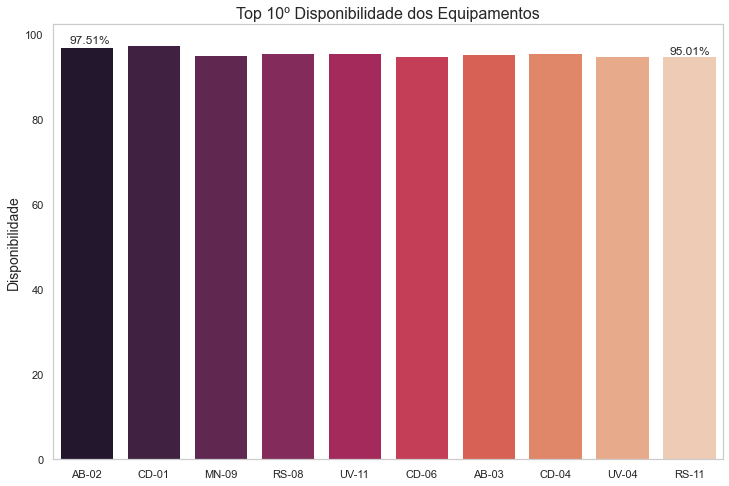

In [25]:
# Representação gráfica para os valores obtidos de Disponibilidade
plt.figure(figsize=(12,8))
ax = sns.set_theme(style = 'whitegrid')
ax = sns.barplot(x = df_final.groupby('Equipamento').apply(kpis).nlargest(10,'Disponibilidade').index, y = 'Disponibilidade', data = df_final.groupby('Equipamento').apply(kpis).nlargest(10,'OEE'), palette = 'rocket')
ax.tick_params(grid_color = 'white')
ax.set_xlabel(None)
ax.set_ylabel('Disponibilidade', fontsize = 14)
ax.set_title('Top 10º Disponibilidade dos Equipamentos', fontsize = 16)
ax.annotate('97.51%', (-0.25,98), fontsize = 12)
ax.annotate('95.01%', (8.7,95.5), fontsize = 12)
plt.show()

In [26]:
# Seleção dos dez equipamentos que apresetaram as maiores Performance acumuladas no semestre
df_final.groupby('Equipamento').apply(kpis).nlargest(10,'Performance').sort_values('Performance', ascending = False)

,Disponibilidade,Performance,Qualidade,OEE
Equipamento,,,,
CD-02,90.93,100.61,99.71,91.22
CD-04,95.24,100.36,99.44,95.04
EF-03,89.46,100.28,99.12,88.92
CD-01,97.00,99.56,99.52,96.12
AB-01,93.94,99.46,99.44,92.92
RS-09,86.58,99.45,98.99,85.23
RS-13,88.16,99.44,98.92,86.72
RS-19,92.43,99.41,99.45,91.39
RS-15,94.87,99.35,99.75,94.02


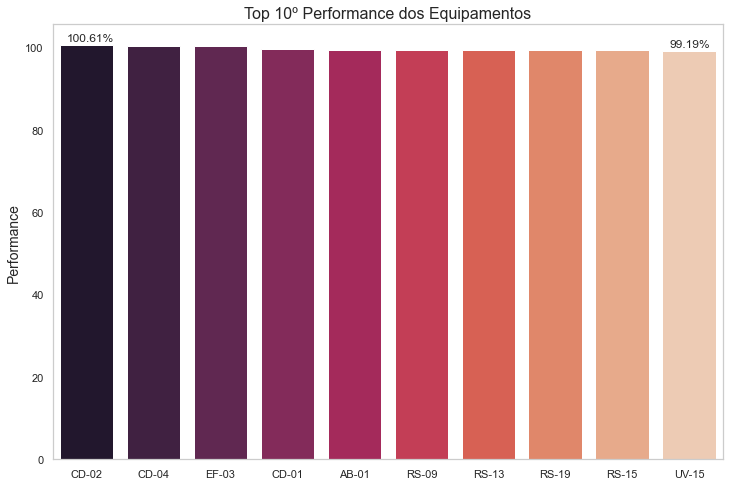

In [27]:
# Representação gráfica para os valores obtidos de Performance
plt.figure(figsize=(12,8))
ax = sns.set_theme(style = 'whitegrid')
ax = sns.barplot(x = df_final.groupby('Equipamento').apply(kpis).nlargest(10,'Performance').index, y = 'Performance', data = df_final.groupby('Equipamento').apply(kpis).nlargest(10,'Performance'), palette = 'rocket')
ax.tick_params(grid_color = 'white')
ax.set_xlabel(None)
ax.set_ylabel('Performance', fontsize = 14)
ax.set_title('Top 10º Performance dos Equipamentos', fontsize = 16)
ax.annotate('100.61%', (-0.3,101.5), fontsize = 12)
ax.annotate('99.19%', (8.7,100), fontsize = 12)
plt.show()

In [28]:
# Seleção dos dez equipamentos que apresetaram os maiores valores para Qualidade acumuladas no semestre
df_final.groupby('Equipamento').apply(kpis).nlargest(10,'Qualidade').sort_values('Qualidade', ascending = False)

,Disponibilidade,Performance,Qualidade,OEE
Equipamento,,,,
UV-20,93.11,97.99,99.88,91.13
RS-11,95.01,98.09,99.87,93.07
UV-11,95.60,98.95,99.86,94.47
CD-08,94.34,97.66,99.85,92.00
RS-08,95.70,98.76,99.80,94.32
EF-01,93.91,98.00,99.78,91.82
RS-05,89.89,97.44,99.77,87.38
AB-02,97.51,98.78,99.76,96.08
RS-21,93.42,98.42,99.76,91.72


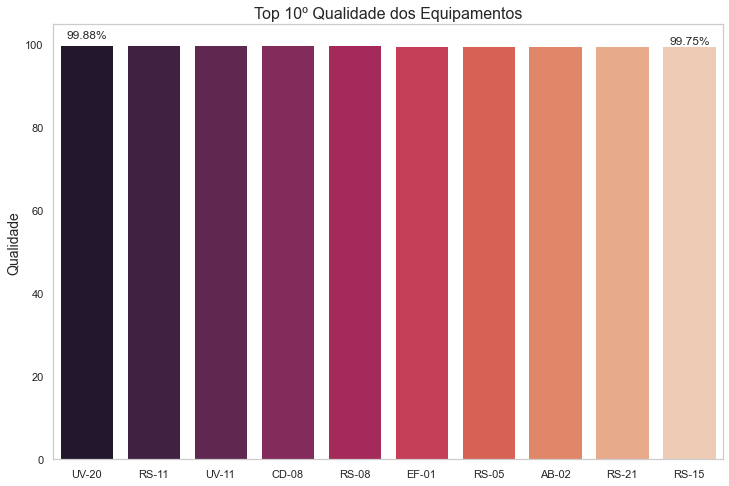

In [29]:
# Representação gráfica para os valores obtidos de Qualidade
plt.figure(figsize=(12,8))
ax = sns.set_theme(style = 'whitegrid')
ax = sns.barplot(x = df_final.groupby('Equipamento').apply(kpis).nlargest(10,'Qualidade').index, y = 'Qualidade', data = df_final.groupby('Equipamento').apply(kpis).nlargest(10,'Qualidade'), palette = 'rocket')
ax.tick_params(grid_color = 'white')
ax.set_xlabel(None)
ax.set_ylabel('Qualidade', fontsize = 14)
ax.set_title('Top 10º Qualidade dos Equipamentos', fontsize = 16)
ax.annotate('99.88%', (-0.3,101.5), fontsize = 12)
ax.annotate('99.75%', (8.7,100), fontsize = 12)
plt.show()

In [30]:
# Seleção dos dez equipamentos que apresetaram os maiores valores de OEE acumuladas no semestre
df_final.groupby('Equipamento').apply(kpis).nlargest(10,'OEE').sort_values('OEE', ascending = False)

,Disponibilidade,Performance,Qualidade,OEE
Equipamento,,,,
CD-01,97.00,99.56,99.52,96.12
AB-02,97.51,98.78,99.76,96.08
CD-04,95.24,100.36,99.44,95.04
UV-11,95.60,98.95,99.86,94.47
RS-08,95.70,98.76,99.80,94.32
RS-15,94.87,99.35,99.75,94.02
AB-03,95.36,98.89,99.69,94.01
MN-09,95.73,98.44,99.73,93.98
UV-04,95.03,98.36,99.65,93.15


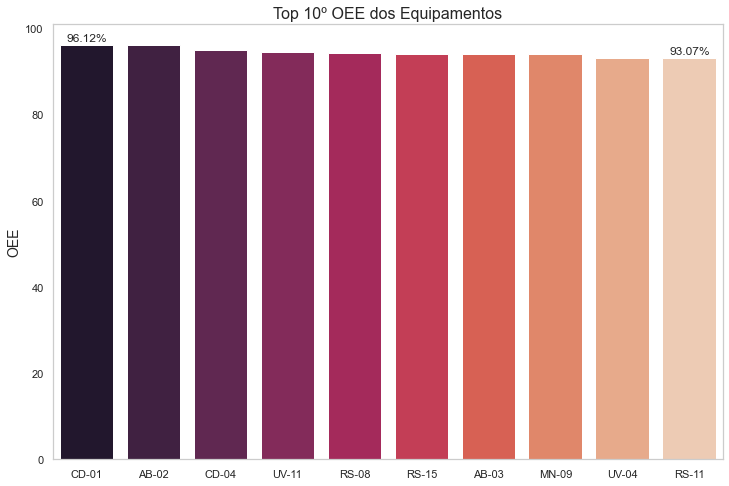

In [31]:
# Representação gráfica para os valores obtidos de OEE
plt.figure(figsize=(12,8))
ax = sns.set_theme(style = 'whitegrid')
ax = sns.barplot(x = df_final.groupby('Equipamento').apply(kpis).nlargest(10,'OEE').index, y = 'OEE', data = df_final.groupby('Equipamento').apply(kpis).nlargest(10,'OEE'), palette = 'rocket')
ax.tick_params(grid_color = 'white')
ax.set_xlabel(None)
ax.set_ylabel('OEE', fontsize = 14)
ax.set_title('Top 10º OEE dos Equipamentos', fontsize = 16)
ax.annotate('96.12%', (-0.3,97), fontsize = 12)
ax.annotate('93.07%', (8.7,94), fontsize = 12)
plt.show()

Análise ao longo do ano do comportamento dos KPIs Industriais

In [32]:
# Tabela com as informações agrupadas pelos meses de produção
df_final.groupby('Mes').apply(kpis)

,Disponibilidade,Performance,Qualidade,OEE
Mes,,,,
07 - JULHO,90.52,98.99,99.46,89.13
08 - AGOSTO,91.99,98.89,99.55,90.56
09 - SETEMBRO,90.33,98.51,99.49,88.52
10 - OUTUBRO,92.90,97.29,99.51,89.94
11 - NOVEMBRO,92.91,98.56,99.58,91.18
12 - DEZEMBRO,92.58,97.22,99.44,89.50


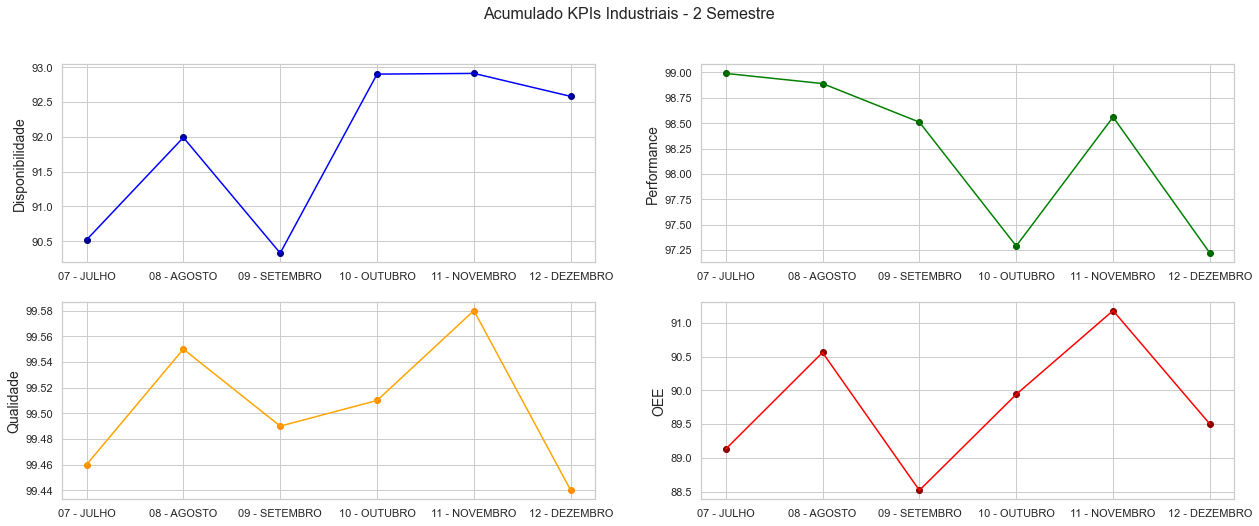

In [33]:
# Representação agrupada das evolução dos KPIs ao longo do semetre
fig, axs = plt.subplots(2, 2, figsize = (21,8))
fig.suptitle('Acumulado KPIs Industriais - 2 Semestre', fontsize = 16, va = 'top')

axs[0, 0].scatter(df_final.groupby('Mes').apply(kpis).index,df_final.groupby('Mes').apply(kpis)['Disponibilidade'], color = 'darkblue')
axs[0, 0].plot(df_final.groupby('Mes').apply(kpis).index,df_final.groupby('Mes').apply(kpis)['Disponibilidade'], color = 'blue')
axs[0, 0].set_ylabel('Disponibilidade', fontsize = 14)

axs[0, 1].scatter(df_final.groupby('Mes').apply(kpis).index,df_final.groupby('Mes').apply(kpis)['Performance'], color = 'darkgreen')
axs[0, 1].plot(df_final.groupby('Mes').apply(kpis).index,df_final.groupby('Mes').apply(kpis)['Performance'], color = 'green')
axs[0, 1].set_ylabel('Performance', fontsize = 14)


axs[1, 0].scatter(df_final.groupby('Mes').apply(kpis).index,df_final.groupby('Mes').apply(kpis)['Qualidade'], color = 'darkorange')
axs[1, 0].plot(df_final.groupby('Mes').apply(kpis).index,df_final.groupby('Mes').apply(kpis)['Qualidade'], color = 'orange')
axs[1, 0].set_ylabel('Qualidade', fontsize = 14)


axs[1, 1].scatter(df_final.groupby('Mes').apply(kpis).index,df_final.groupby('Mes').apply(kpis)['OEE'], color = 'darkred')
axs[1, 1].plot(df_final.groupby('Mes').apply(kpis).index,df_final.groupby('Mes').apply(kpis)['OEE'], color = 'red')
axs[1, 1].set_ylabel('OEE', fontsize = 14)

plt.show()

Analisando os dados detalhadamente para os meses que apresentaram os melhores e piores valores do KPIs

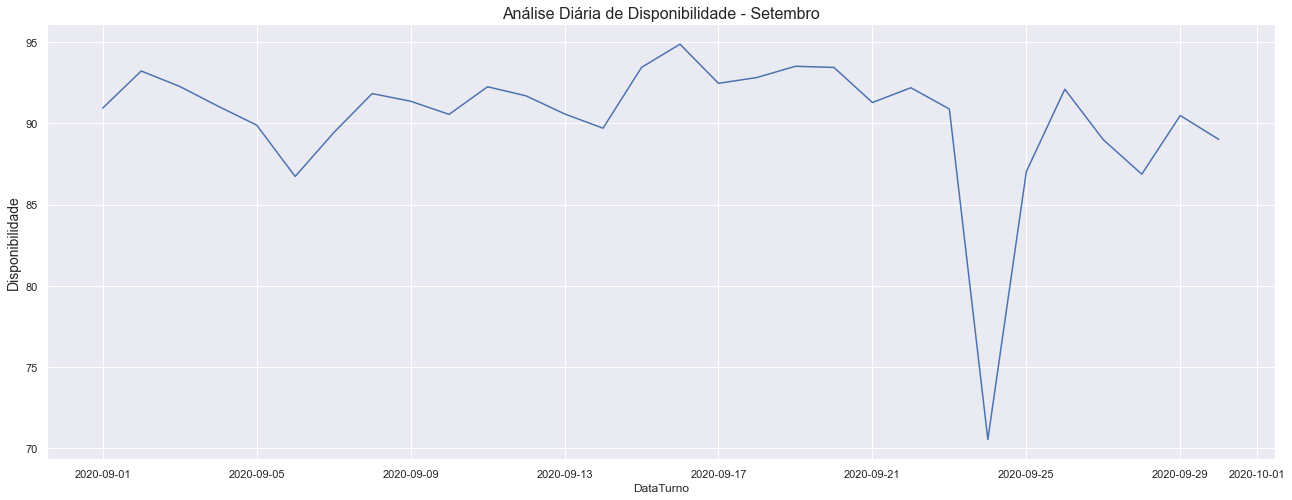

In [34]:
#Analisando o mes com a pior disponibilidade registrada, Setembro.
plt.figure(figsize= (22,8))
sns.set_theme(style='darkgrid')
ax = sns.lineplot(df_final.groupby('DataTurno').apply(kpis)[df_final.groupby('DataTurno').apply(kpis).index.month == 9].index, df_final.groupby('DataTurno').apply(kpis)[df_final.groupby('DataTurno').apply(kpis).index.month == 9]['Disponibilidade'])
ax.set_title('Análise Diária de Disponibilidade - Setembro', fontsize = 16)
ax.set_ylabel('Disponibilidade', fontsize = 14)
plt.show()

In [35]:
# Exibição do dia com o menor valor registrado para a Disponibilidade
df_final.groupby('DataTurno').apply(kpis)[df_final.groupby('DataTurno').apply(kpis).index.month == 9].nsmallest(1,'Disponibilidade')

,Disponibilidade,Performance,Qualidade,OEE
DataTurno,,,,
2020-09-24,70.54,99.95,99.57,70.2


Através da analise é possivel verificar que o dia 24 de Setembro foi registrado o dia com a menor disponibilidade dos equipamentos, por motivos de falhas no abastecimento externo de energia da planta ocorreram diversas paradas nos equipamentos ao longo do dia em questão, impactando diretamento no resultado final. 

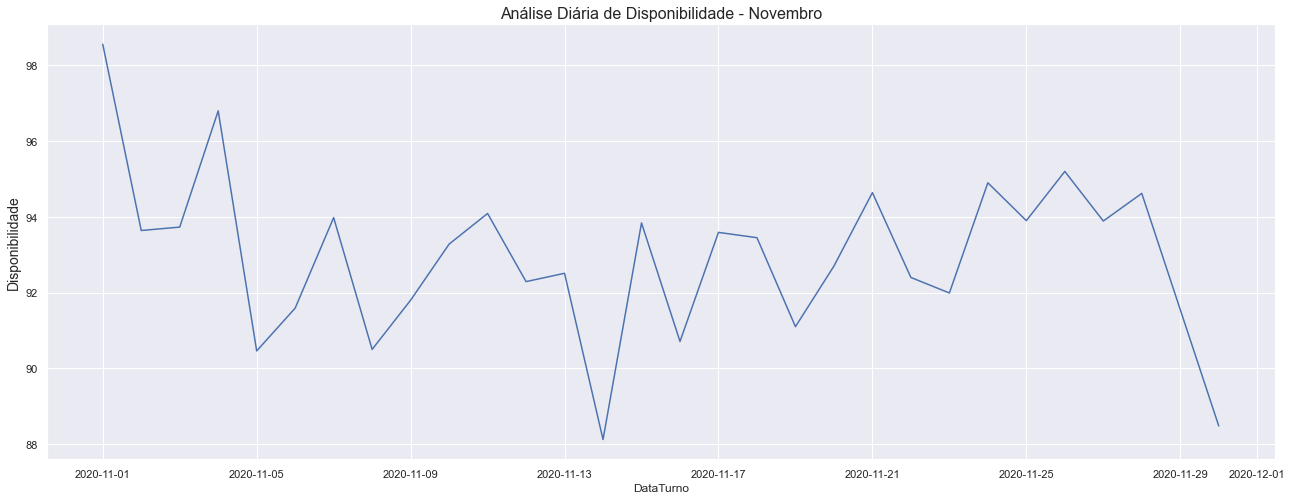

In [36]:
plt.figure(figsize= (22,8))
sns.set_theme(style='darkgrid')
ax = sns.lineplot(df_final.groupby('DataTurno').apply(kpis)[df_final.groupby('DataTurno').apply(kpis).index.month == 11].index, df_final.groupby('DataTurno').apply(kpis)[df_final.groupby('DataTurno').apply(kpis).index.month == 11]['Disponibilidade'])
ax.set_title('Análise Diária de Disponibilidade - Novembro', fontsize = 16)
ax.set_ylabel('Disponibilidade', fontsize = 14)
plt.show()

In [37]:
# Exibição do dia com o maior valor registrado para a Disponibilidade
df_final.groupby('DataTurno').apply(kpis)[df_final.groupby('DataTurno').apply(kpis).index.month == 11].nlargest(1,'Disponibilidade')

,Disponibilidade,Performance,Qualidade,OEE
DataTurno,,,,
2020-11-01,98.56,97.1,99.88,95.58


Por usa vez o mês de Novembro apresentou o melhor resultado acumulado do KPI de Disponibilidade. Através do grafico de linha com o acompanhamento dos dias do mês é possível observar que em apenas dois dias o valor da disponibilidade alcançada foi inferior ao valor de 90%, sendo que no dia 1 do mês foi alcançado o valor de 98,56%.

Finalizando a análise dos KPIs Industriais é feito o detalhamento do OEE dos piores equipamentos no mês que apresentou o menor indicador, bem como a exibição gráfica dos melhores equipamentos no mês de maior OEE alcançado.

Equipamentos com os maiores valores de OEE alcançados no mês de Novembro.

In [38]:
# Exibição do agrupamento por mês, sendo filtrado o mês que deseja ser analisado
df_final.groupby(['Mes','Equipamento']).apply(kpis)[df_final.groupby(['Mes','Equipamento']).apply(kpis).index.get_level_values(0) == '11 - NOVEMBRO'].nlargest(10,'OEE')

Disponibilidade  Performance  Qualidade    OEE
Mes           Equipamento                                                
11 - NOVEMBRO MN-09                  97.94       100.25      99.82  98.00
              EF-01                  99.70        97.88      99.94  97.54
              CD-01                  98.64        99.00      99.63  97.29
              CD-02                  95.09       102.27      99.88  97.13
              UV-11                  98.41        98.67      99.83  96.94
              RS-11                  96.82       100.22      99.87  96.90
              RS-18                  97.77        98.87      99.88  96.54
              UV-03                  96.63       100.10      99.63  96.37
              RS-15                  96.73        98.84      99.69  95.32
              AB-02                  98.37        96.97      99.92  95.31

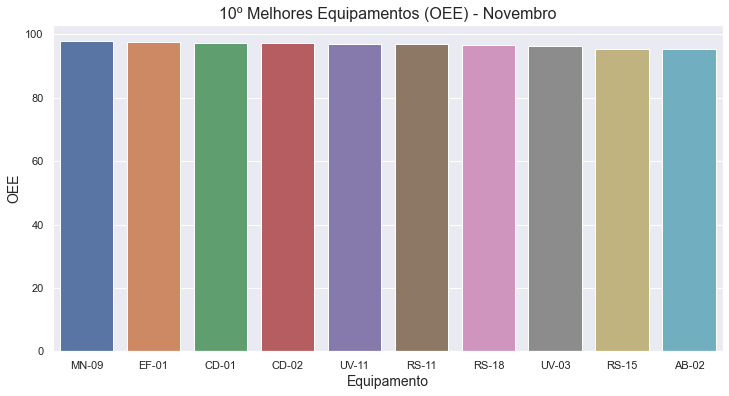

In [39]:
# Representação gráfica dos dez equipamentos que apresentaram o maior OEE no mês de Novembro
plt.figure(figsize = (12,6))

ax = sns.barplot(df_final.groupby(['Mes','Equipamento']).apply(kpis)[df_final.groupby(['Mes','Equipamento']).apply(kpis).index.get_level_values(0) == '11 - NOVEMBRO'].nlargest(10,'OEE').index.get_level_values(1), 
            df_final.groupby(['Mes','Equipamento']).apply(kpis)[df_final.groupby(['Mes','Equipamento']).apply(kpis).index.get_level_values(0) == '11 - NOVEMBRO'].nlargest(10,'OEE')['OEE']
            )

ax.set_title('10º Melhores Equipamentos (OEE) - Novembro', fontsize = 16)
ax.set_ylabel('OEE', fontsize = 14)
ax.set_xlabel('Equipamento', fontsize = 14)
plt.show()

In [40]:
# Exibição do agrupamento por mês, sendo filtrado o mês que deseja ser analisado
df_final.groupby(['Mes','Equipamento']).apply(kpis)[df_final.groupby(['Mes','Equipamento']).apply(kpis).index.get_level_values(0) == '09 - SETEMBRO'].nsmallest(10,'OEE')

Disponibilidade  Performance  Qualidade    OEE
Mes           Equipamento                                                
09 - SETEMBRO UV-10                  55.24        95.19      98.30  51.69
              EF-02                  70.86        98.07      95.38  66.29
              EF-04                  84.41        85.87      98.12  71.12
              UV-14                  78.34        99.01      99.06  76.83
              RS-10                  79.19        98.74      99.01  77.42
              CD-02                  79.88        98.47      99.52  78.28
              RS-09                  81.11        99.74      98.56  79.74
              RS-13                  82.90        98.17      98.64  80.27
              UV-03                  82.16        99.17      99.38  80.97
              UV-09                  84.29        97.58      99.27  81.65

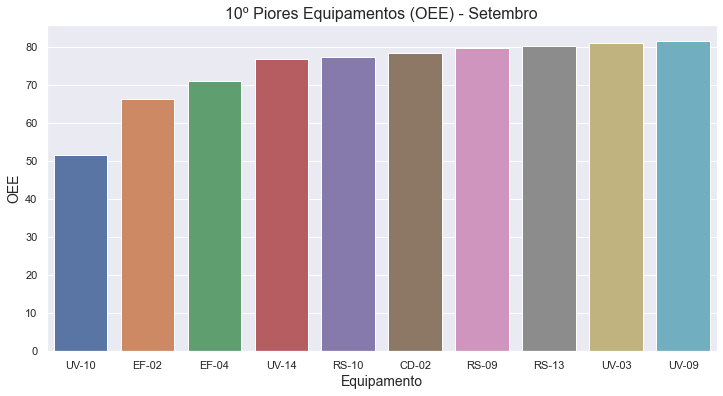

In [41]:
# Representação gráfica dos dez equipamentos que apresentaram o menor OEE no mês de Setembro
plt.figure(figsize = (12,6))

ax = sns.barplot(df_final.groupby(['Mes','Equipamento']).apply(kpis)[df_final.groupby(['Mes','Equipamento']).apply(kpis).index.get_level_values(0) == '09 - SETEMBRO'].nsmallest(10,'OEE').index.get_level_values(1), 
            df_final.groupby(['Mes','Equipamento']).apply(kpis)[df_final.groupby(['Mes','Equipamento']).apply(kpis).index.get_level_values(0) == '09 - SETEMBRO'].nsmallest(10,'OEE')['OEE']
            )

ax.set_title('10º Piores Equipamentos (OEE) - Setembro', fontsize = 16)
ax.set_ylabel('OEE', fontsize = 14)
ax.set_xlabel('Equipamento', fontsize = 14)
plt.show()